In [1]:
from astroquery.mast import Observations
from ccdproc import ImageFileCollection
from astropy.table import Table
from astropy.io import fits
from astropy.io import ascii
from astropy.visualization import ZScaleInterval
from IPython.display import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from drizzlepac import tweakreg
from drizzlepac import astrodrizzle



The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


A way to import files from each visit <br>

In [2]:
science_list = Observations.query_criteria(proposal_id='16231', filters='F150LP',obs_id='jec401010')
Observations.download_products(science_list['obsid'], mrp_only=False, download_dir='./science',\
                               productSubGroupDescription=['FLT'])

science_files = glob.glob(os.path.join(os.curdir, 'science', 'mastDownload', 'HST', '*', '*fits'))
for im in science_files:
    root = im.split('/')[-1]
    os.rename(im, './' + root)
shutil.rmtree('science/')

In [5]:
Observations.query_criteria?

In [17]:
collect = ImageFileCollection('./', glob_include="*flt.fits", ext=0,
                                 keywords=["asn_id", "detector", "filter", "nsamp",
                                           "exptime", "postarg1", "postarg2"])

table = collect.summary
table['exptime'].format = '7.1f'
table['postarg1'].format = '7.2f'
table['postarg2'].format = '7.2f'
table

file,asn_id,detector,filter,nsamp,exptime,postarg1,postarg2
str45,str9,str3,float64,float64,float64,float64,float64
hst_16231_01_acs_sbc_f150lp_jec401no_flt.fits,JEC401010,SBC,--,--,624.0,-0.21,-0.36
hst_16231_01_acs_sbc_f150lp_jec401nr_flt.fits,JEC401010,SBC,--,--,624.0,0.63,-0.05
hst_16231_01_acs_sbc_f150lp_jec401nv_flt.fits,JEC401010,SBC,--,--,624.0,0.21,0.36
hst_16231_01_acs_sbc_f150lp_jec401nx_flt.fits,JEC401010,SBC,--,--,624.0,-0.63,0.05
jec401noq_flt.fits,JEC401010,SBC,--,--,624.0,-0.21,-0.36
jec401nrq_flt.fits,JEC401010,SBC,--,--,624.0,0.63,-0.05
jec401nvq_flt.fits,JEC401010,SBC,--,--,624.0,0.21,0.36
jec401nxq_flt.fits,JEC401010,SBC,--,--,624.0,-0.63,0.05


In [18]:
science_list

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str5,int64,str3,str9,str24,float64,float64,float64,float64,float64,str2,str6,float64,float64,str32,str117,float64,str7,str12,str5,str2,str3,int64,str6,str469,str34,str35,str6,bool,float64,str7,str8,str9
image,3,HST,jec401010,SDSS-J211824.06+001729.4,319.600301831,0.2916033187818,59361.28522789352,59361.31620011574,2496.0,UV,F150LP,147.0,200.0,GALAXY;INTERACTING GALAXY;STARBU,Witnessing the circumgalactic medium in formation: Imaging OVI in the warm-hot CGM of a record-breaking galactic wind,59545.6085995,ACS/SBC,"Rupke, David",16231,GO,HST,--,CALACS,POLYGON -40.404804619999993 0.29382642 -40.400379069999985 0.28534736 -40.400274148443515 0.28541562806207654 -40.400219919999984 0.28531173 -40.39307212 0.28996249 -40.393180581210551 0.29017029393850308 -40.393127610000022 0.29020476 -40.397553159999973 0.29868382 -40.397658077686792 0.2986155545773857 -40.397712309999974 0.29871946 -40.404860110000016 0.29406869 -40.404751648678179 0.29386088619566242 -40.404804619999993 0.29382642 -40.404804619999993 0.29382642,mast:HST/product/jec401010_drz.jpg,mast:HST/product/jec401010_drz.fits,PUBLIC,False,nan,science,60942439,153119885


Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 16:25:29.101 (01/06/2022) 

Version Information
--------------------
Python Version [Clang 12.0.0 ]
3.7.13 (default, Mar 28 2022, 07:24:34) 
numpy Version -> 1.21.5 
astropy Version -> 4.3.1 
stwcs Version -> 1.6.1 

Finding shifts for: 
    jec401noq_flt.fits
    jec401nrq_flt.fits

===  Source finding for image 'jec401noq_flt.fits':
  #  Source finding for 'jec401noq_flt.fits', EXT=('SCI', 1) started at: 16:25:29.209 (01/06/2022)
! WARNING: Clipped data falls within 1 histogram bin
     Found 6878 objects.
===  FINAL number of objects in image 'jec401noq_flt.fits': 6878

===  Source finding for image 'jec401nrq_flt.fits':
  #  Source finding for 'jec401nrq_flt.fits', EXT=('SCI', 1) started at: 16:25:29.626 (01/06/2022)
! WARNING: Clipped data falls within 1 histogram bin
     Found 7090 objects.
===  FINAL number of objects in image 'jec401nrq_flt.fits': 7090


Performing alignment in the projection 

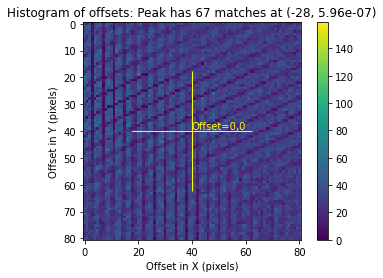

Found 99 matches for jec401nrq_flt.fits...
Computed  rscale  fit for  jec401nrq_flt.fits : 
XSH: -28.2086  YSH: -0.0386    ROT: 359.9997792    SCALE: 0.999879
FIT XRMS: 0.075      FIT YRMS: 0.52   
FIT RMSE: 0.53       FIT MAE: 0.45   

RMS_RA: 2.8e-06 (deg)   RMS_DEC: 2.4e-06 (deg)

Final solution based on  89  objects.
wrote XY data to:  jec401nrq_flt_catalog_fit.match
Total # points: 89
# of points after clipping: 89
Total # points: 89
# of points after clipping: 89
Press ENTER for next image, 
      'n' to continue without updating header or 
      'q' to quit immediately...
n
Trailer file written to:  tweakreg.log


ValueError: 'fname' must be a file object opened in 'update' mode.

ValueError: 'fname' must be a file object opened in 'update' mode.

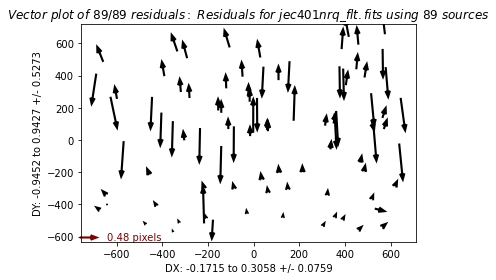

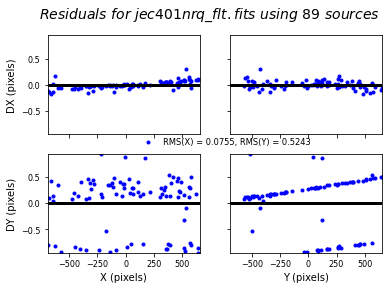

In [4]:
tweakreg.TweakReg('*_flt.fits')

In [20]:
from astropy.io import fits

In [21]:
file = fits.open('jec401noq_flt.fits')

In [39]:
file[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-13' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    8 / Number of standard extensions                  
FILENAME= 'jec401noq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             